Run the GLM on the Matlab stuff and see what I get

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
from scipy import io as sio
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
sbt_effects = ((1,2),(1,5),(2,5),(3,1),(3,2),(6,1),(6,5))

In [4]:
base_path = '/data1/guilimin/abide/subtype/sc7/full_maybe/'
w_tmp = 'sbt_weights_net_{}.csv'
m_path = '/data1/guilimin/abide/pheno/sc7/model_full_maybe_sc7.csv'

In [5]:
# Model
model = pd.read_csv(m_path)

In [6]:
model.DX_GROUP.replace({1:'patients', 2:'controls'}, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


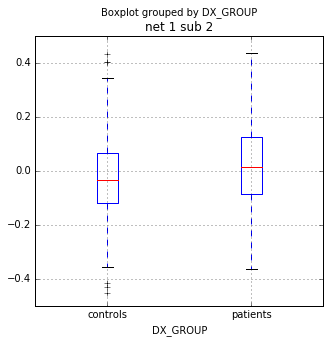

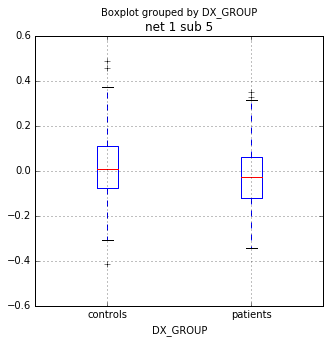

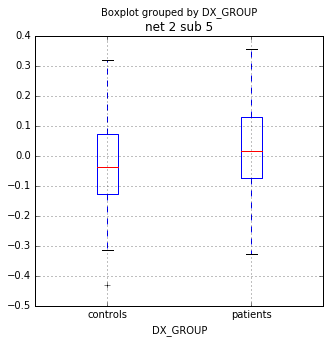

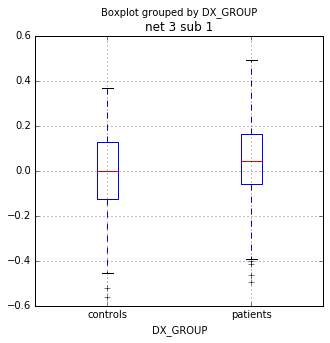

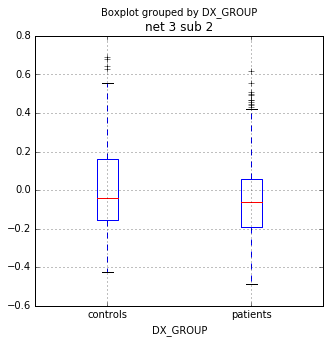

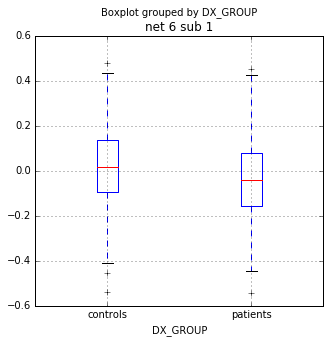

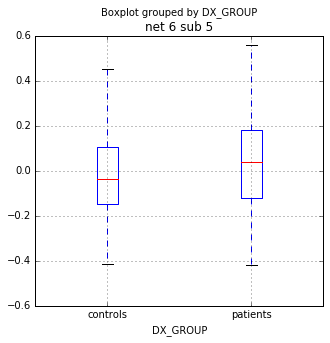

In [14]:
for eff in sbt_effects:
    network, subtype = eff
    weights = pd.read_csv(os.path.join(base_path, w_tmp.format(network)))
    weights.rename(columns={' ':'SUB_ID'}, inplace=True)
    weights.columns = weights.columns.str.strip(' ')
    weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)
    merged = pd.merge(model, weights, on='SUB_ID', how='inner')

    f = plt.figure(figsize=(5,5))
    ax = f.add_subplot(1,1,1)
    for ids, (a, b) in enumerate(merged.groupby('DX_GROUP')):
        y = b['sub{}'.format(subtype)].values
        x = np.random.normal(ids+1, 0.1, len(y))
        #ax.plot(x, y, '.k')
    merged.boxplot('sub{}'.format(subtype), by='DX_GROUP', ax=ax)
    ax.set_title('net {} sub {}'.format(network, subtype))

In [10]:
a

'controls'